


# **Implementation of Federated Learning using TensorFlow Federated (TFF) on the MNIST Dataset**

**About :**
This is a tutorial on the EMNIST dataset, where we created a federated algorithm to create a model for a decentralized data like the EMNIST dataset, using the federated tensorflow package.

# **1. installing packages :**

In [ ]:
!pip install --quiet --upgrade tensorflow-federated # we install and upgrade the tensorflow-federated package
!pip install --quiet --upgrade nest-asyncio # we install and upgrade the nest-asyncio package

import nest_asyncio
nest_asyncio.apply()

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 40.1/40.1 MB 11.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.6/60.6 KB 4.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 89.9/89.9 KB 6.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 72.0/72.0 MB 10.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 255.8/255.8 KB 16.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.0/3.0 MB 43.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 142.7/142.7 KB 9.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 238.9/238.9 KB 17.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 43.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 120.2/120.2 KB 10.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 349.0/349.0 KB 26.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 39.8/39.8 MB 6.3 MB/s eta 0:

NEST_ASYNCIO:
- nest_asyncio is a Python package that provides support for running asynchronous code in nested event loops. It is commonly used with packages like tensorflow-federated that use asyncio-based code to enable distributed computing.

# **2. importing packages :**

In [ ]:
import tensorflow as tf
import tensorflow_federated as tff
import matplotlib.pyplot as plt
import numpy as np

# **3. Loading the data :**

In [ ]:
emnist_train, emnist_test = tff.simulation.datasets.emnist.load_data()

In [ ]:
len(emnist_train.client_ids)

3383

- We can clearly see that we have 3383 clients, each client is represented by a tf.data.Dataset object containing a subset of the data. The subsets are disjoint.

In [ ]:
exemple_dataset = emnist_train.create_tf_dataset_for_client(emnist_train.client_ids[0]) # this is subset of the data that is contained by the first client
exemple_dataset.element_spec # The "element_spec"  describes the structure of the elements in the dataset.

OrderedDict([('label', TensorSpec(shape=(), dtype=tf.int32, name=None)),
             ('pixels',
              TensorSpec(shape=(28, 28), dtype=tf.float32, name=None))])

Each element of the dataset has two components:

- 'label': A scalar tensor (shape=()) of type tf.int32, representing the label for the image.
- 'pixels': A 2D tensor (shape=(28, 28)) of type tf.float32, representing the grayscale pixel values of the image.

In [ ]:
#let's select an exemple element of the "exemple_dataset" subset ( one element from the first client)
exemple_element = next(iter(exemple_dataset))
exemple_element['label'].numpy()

1

- The label of this element is the number 1

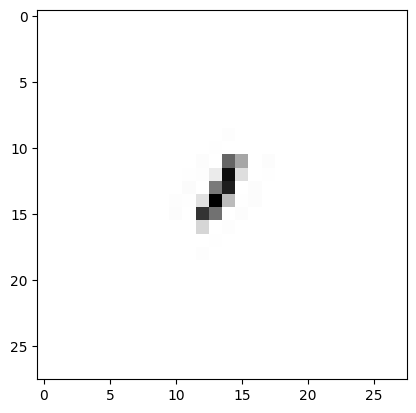

In [ ]:
plt.imshow(exemple_element['pixels'].numpy(),cmap='gray',aspect="equal") # we want to display the second component which is the image
plt.show()

- And it is 1 displayed as indicated by the label

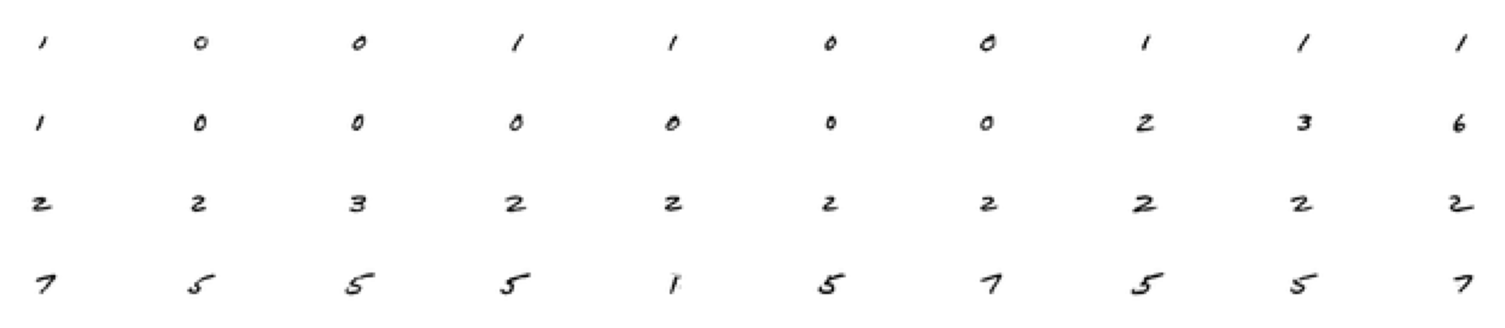

In [ ]:
# let's display 40 elements of the first client's subset:
f = plt.figure(figsize=(20,4))
j=0
for e in exemple_dataset.take(40): # we chose 40 elements
  plt.subplot(4,10,j+1)
  plt.imshow(e['pixels'].numpy(),cmap='gray',aspect="equal") # we show the image of each element
  plt.axis('off')
  j=j+1

defaultdict(<class 'list'>, {1: [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], 0: [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], 2: [2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2], 3: [3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3], 6: [6, 6, 6, 6, 6, 6, 6, 6, 6], 7: [7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7], 5: [5, 5, 5, 5, 5, 5, 5], 9: [9, 9, 9, 9, 9, 9, 9, 9], 8: [8, 8, 8, 8, 8, 8, 8], 4: [4, 4, 4, 4, 4, 4, 4]})

defaultdict(<class 'list'>, {1: [1, 1, 1, 1, 1, 1, 1, 1, 1, 1], 0: [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], 7: [7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7], 5: [5, 5, 5, 5, 5, 5, 5, 5, 5, 5], 2: [2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2], 6: [6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6], 8: [8, 8, 8, 8, 8, 8, 8, 8, 8, 8], 4: [4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4], 3: [3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3], 9: [9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9]})

defaultdict(<class 'list'>, {1: [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], 0: [0, 0, 0, 0, 0], 6: [6, 6, 6, 6, 6, 6], 4: [4, 4, 4, 4, 4, 4, 4, 4], 5: [5, 5, 5, 5, 5, 5], 3: [3, 3, 3, 3, 3, 3, 3], 8: [8, 8, 8, 8, 8, 8], 7: [7, 7, 7, 7, 7,

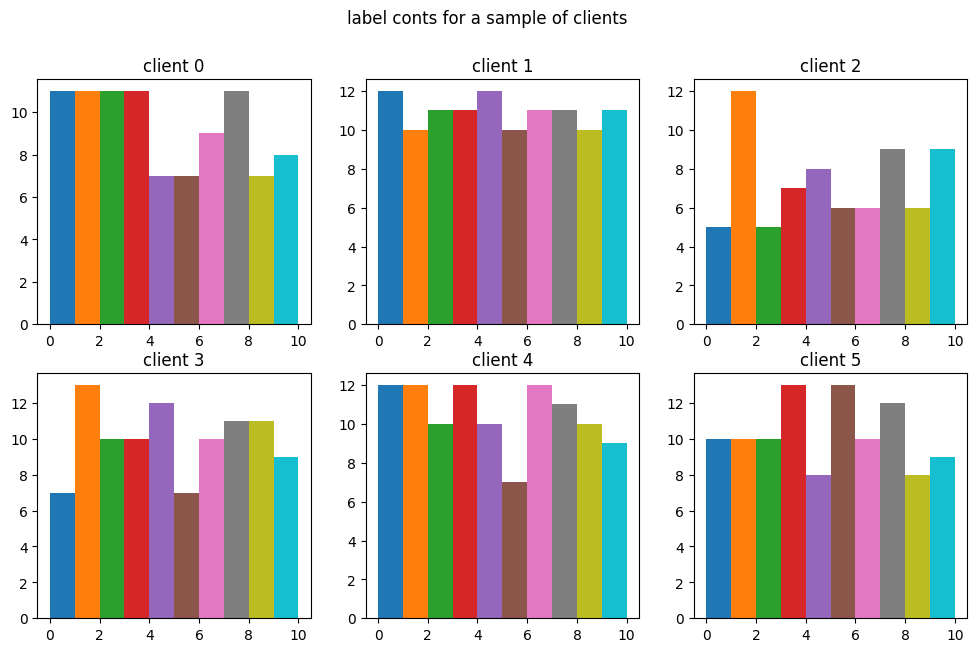

In [ ]:
from tensorflow_federated.python.core.impl.computation.computation_wrapper import collections
# we will create a histogram counting the number of elements contained in 6 clients
f= plt.figure(figsize=(12,7))
f.suptitle("label conts for a sample of clients")
for i in range(6): # for 6 clients
  ds = emnist_train.create_tf_dataset_for_client(emnist_train.client_ids[i])
  k = collections.defaultdict(list)
  for e in ds: # for every element in client i
    k[e['label'].numpy()].append(e['label'].numpy()) #  k is a defaultdict object that counts the number of examples for each label in client i
  print(k)
  print()
  plt.subplot(2,3,i+1)
  plt.title("client {}".format(i))
  for j in range(10):
    plt.hist(k[j], density=False, bins=[0,1,2,3,4,5,6,7,8,9,10]) # we display a histogram for each of the 6 clients


# **Preprocessing the data :**

In [ ]:
NUM_CLIENTS = 10
BATCH_SIZE = 20 # the size of batch is 20
NUM_EPOCHS = 5 # number of repeating the dataset so that the model can see it multiple times
SHUFFLE_BUFFER= 100 # the buffer size is 100
PREFETCH_BUFFER = 10
def preprocess(dataset):
  """ we defined this function that takes a dataset as imput and prepare it for the neural network model"""

  def batch_format_fn(element):
    """Flatten a batch of EMNIST data and return a (features, label) tuple.""" #in this step we will flaten each (28,28) image into a table
    return (tf.reshape(element['pixels'], [-1, 784]),
            tf.reshape(element['label'], [-1, 1]))

  return dataset.repeat(NUM_EPOCHS).shuffle(SHUFFLE_BUFFER).batch(BATCH_SIZE).map(batch_format_fn).prefetch(PREFETCH_BUFFER)


In [ ]:
preprocessed_example_dataset = preprocess(exemple_dataset) # we process the first client's subset as example
sample_batch = tf.nest.map_structure(lambda x: x.numpy(),next(iter(preprocessed_example_dataset))) # this function convert the first batch of the preprocessed_example_dataset into numpy arrays
sample_batch

(array([[1., 1., 1., ..., 1., 1., 1.],
        [1., 1., 1., ..., 1., 1., 1.],
        [1., 1., 1., ..., 1., 1., 1.],
        ...,
        [1., 1., 1., ..., 1., 1., 1.],
        [1., 1., 1., ..., 1., 1., 1.],
        [1., 1., 1., ..., 1., 1., 1.]], dtype=float32),
 array([[1],
        [2],
        [3],
        [2],
        [2],
        [0],
        [1],
        [1],
        [6],
        [0],
        [2],
        [8],
        [4],
        [4],
        [3],
        [7],
        [1],
        [9],
        [0],
        [0]], dtype=int32))

- We can clearly see that the output is a tuple containing two numpy arrays. The first array is of shape (20, 784), representing 20 flattened images with 784 features each. The second array is of shape (20, 1), representing 20 labels.

In [ ]:
#let's verify that the preprocessing worked:
client_ids = sorted(emnist_train.client_ids)[:NUM_CLIENTS] #here we selected 10 clients and applyed the preprocessing on them
federated_train_data = [preprocess(emnist_train.create_tf_dataset_for_client(x))
  for x in client_ids
] # for every client of the 10 selected clients we applied the preprocess function
federated_train_data

[<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 784), dtype=tf.float32, name=None), TensorSpec(shape=(None, 1), dtype=tf.int32, name=None))>,
 <_PrefetchDataset element_spec=(TensorSpec(shape=(None, 784), dtype=tf.float32, name=None), TensorSpec(shape=(None, 1), dtype=tf.int32, name=None))>,
 <_PrefetchDataset element_spec=(TensorSpec(shape=(None, 784), dtype=tf.float32, name=None), TensorSpec(shape=(None, 1), dtype=tf.int32, name=None))>,
 <_PrefetchDataset element_spec=(TensorSpec(shape=(None, 784), dtype=tf.float32, name=None), TensorSpec(shape=(None, 1), dtype=tf.int32, name=None))>,
 <_PrefetchDataset element_spec=(TensorSpec(shape=(None, 784), dtype=tf.float32, name=None), TensorSpec(shape=(None, 1), dtype=tf.int32, name=None))>,
 <_PrefetchDataset element_spec=(TensorSpec(shape=(None, 784), dtype=tf.float32, name=None), TensorSpec(shape=(None, 1), dtype=tf.int32, name=None))>,
 <_PrefetchDataset element_spec=(TensorSpec(shape=(None, 784), dtype=tf.float32, name=None), T

# **5.Creating a model with Keras:**

In [ ]:
def create_keras_model():
  """ here we defined a simple model with an input layer size of 784, a hidden layer with 10 nodes,
  and an output layer using softmax activation function. The weights in the hidden layer are
   initialized using GlorotNormal initialization """

  initializer = tf.keras.initializers.GlorotNormal(seed=0)
  return tf.keras.models.Sequential([
      tf.keras.layers.Input(shape=(784,)),
      tf.keras.layers.Dense(10, kernel_initializer=initializer),
      tf.keras.layers.Softmax(),
  ])

In [ ]:
def model_fn():
  """ This function defines a TFF model for federated learning by converting
  the Keras model done earlier into a TFF model using the tff.learning.models.from_keras_model method """
  keras_model = create_keras_model()
  return tff.learning.models.from_keras_model(
      keras_model,
      input_spec=federated_train_data[0].element_spec,
      loss=tf.keras.losses.SparseCategoricalCrossentropy(),
      metrics=[tf.keras.metrics.SparseCategoricalAccuracy()])

# **Training the model on federated data:**

# Creating and initializing computations:

Computation:
- In TensorFlow Federated (TFF), a computation is a unit of code that can be executed remotely on a collection of devices.
- It is a fundamental concept in TFF, and it is what allows the framework to perform federated learning.
- By defining computations that can be executed remotely on multiple devices, TFF enables the training of machine learning models using data that is distributed across those devices.


In TFF, a federated algorithm is typically represented as a an iterative process, it's is a class that contains `initialize` and `next` functions. Here, `initialize` is used to initialize the server, and `next` will perform one communication round of the federated algorithm.

  **Initialize function :**
the function initialize creates a `tff.learning.models.VariableModel`, and returns its trainable weights.

In [ ]:
@tff.tf_computation
def server_init():
  model = model_fn()
  return model.trainable_variables

we then pass this value into a federated computation

In [ ]:
@tff.federated_computation
def initialize_fn():
  return tff.federated_value(server_init(), tff.SERVER)

In [ ]:
whimsy_model = model_fn()
tf_dataset_type = tff.SequenceType(whimsy_model.input_spec)

In [ ]:
str(tf_dataset_type)

'<float32[?,784],int32[?,1]>*'

here we use  the  `server_init` function defined above to extract the model weights type

In [ ]:
model_weights_type = server_init.type_signature.result

In [ ]:
str(model_weights_type)

'<float32[784,10],float32[10]>'

In [ ]:
@tf.function
def client_update(model, dataset, server_weights, client_optimizer):
  """Performs training (using the server model weights) on the client's dataset."""
  # Initialize the client model with the current server weights.
  client_weights = model.trainable_variables
  # Assign the server weights to the client model.
  tf.nest.map_structure(lambda x, y: x.assign(y),
                        client_weights, server_weights)

  # Use the client_optimizer to update the local model.
  for batch in dataset:
    with tf.GradientTape() as tape:
      # Compute a forward pass on the batch of data
      outputs = model.forward_pass(batch)

    # Compute the corresponding gradient
    grads = tape.gradient(outputs.loss, client_weights)
    grads_and_vars = zip(grads, client_weights)

    # Apply the gradient using a client optimizer.
    client_optimizer.apply_gradients(grads_and_vars)

  return client_weights

In [ ]:
@tf.function
def server_update(model, mean_client_weights):
  """Updates the server model weights as the average of the client model weights."""
  model_weights = model.trainable_variables
  # Assign the mean client weights to the server model.
  tf.nest.map_structure(lambda x, y: x.assign(y),
                        model_weights, mean_client_weights)
  return model_weights

# **Client update:**


In [ ]:
@tff.tf_computation(tf_dataset_type, model_weights_type)
def client_update_fn(tf_dataset, server_weights):
  model = model_fn()
  client_optimizer = tf.keras.optimizers.SGD(learning_rate=0.01)
  return client_update(model, tf_dataset, server_weights, client_optimizer)

# **Server Update :**
The server update for FedAvg is simpler than the client update. in this exemple we  implemented the  "vanilla" federated averaging, in which the server model weights are replaced by the average of the client model weights. Again, this only uses the trainable weights.

In [ ]:
@tff.tf_computation(model_weights_type)
def server_update_fn(mean_client_weights):
  model = model_fn()
  return server_update(model, mean_client_weights)

In [ ]:
federated_server_type = tff.FederatedType(model_weights_type, tff.SERVER)
federated_dataset_type = tff.FederatedType(tf_dataset_type, tff.CLIENTS)

**Next function :**
now we will create our federated learning algorithm in these 4 steps:

1. A server-to-client broadcast step.
2. A local client update step.
3. A client-to-server upload step.
4. A server update step.
we will be combining all the above functions into a federated computatuion

In [ ]:
@tff.federated_computation(federated_server_type, federated_dataset_type)
def next_fn(server_weights, federated_dataset):
  # Broadcast the server weights to the clients.
  server_weights_at_client = tff.federated_broadcast(server_weights)
 # in this step the server sends the updated wieghts to the client.

  # Each client computes their updated weights.
  client_weights = tff.federated_map(
      client_update_fn, (federated_dataset, server_weights_at_client))

  # The server averages these updates.
  mean_client_weights = tff.federated_mean(client_weights)

  # The server updates its model.
  server_weights = tff.federated_map(server_update_fn, mean_client_weights)

  return server_weights

Now we create an iterative process to repeat the federated algorithm into multiple rounds.

In [ ]:
federated_algorithm = tff.templates.IterativeProcess(
    initialize_fn=initialize_fn,
    next_fn=next_fn
)

In [ ]:
str(federated_algorithm.initialize.type_signature)

'( -> <float32[784,10],float32[10]>@SERVER)'

This reflects the fact that `federated_algorithm.initialize` is a no-arg function that returns a single-layer model (with a 784-by-10 weight matrix, and 10 bias units).

In [ ]:
str(federated_algorithm.next.type_signature)

'(<server_weights=<float32[784,10],float32[10]>@SERVER,federated_dataset={<float32[?,784],int32[?,1]>*}@CLIENTS> -> <float32[784,10],float32[10]>@SERVER)'

Here, we can see that `federated_algorithm.next` accepts a server model and client data, and returns an updated server model.

# **Evaluating the model :**

we will evaluate our model using the accuracy and the loss function
Let's run a few rounds, and see how the loss changes. First, we will define an evaluation function.

We will first create a centralized evaluation dataset, and then apply the same preprocessing we used for the training data.

In [ ]:
central_emnist_test = emnist_test.create_tf_dataset_from_all_clients()
central_emnist_test = preprocess(central_emnist_test)

Next, we will write a function that accepts a server state, and uses Keras to evaluate on the test dataset.

In [ ]:
def evaluate(server_state):
  keras_model = create_keras_model()
  keras_model.compile(
      loss=tf.keras.losses.SparseCategoricalCrossentropy(),
      metrics=[tf.keras.metrics.SparseCategoricalAccuracy()]
  )
  keras_model.set_weights(server_state)
  keras_model.evaluate(central_emnist_test)

In [ ]:
server_state = federated_algorithm.initialize()
evaluate(server_state)

10208/10208 [==============================] - 42s 4ms/step - loss: 2.8479 - sparse_categorical_accuracy: 0.1027


for the first round we got an accuarcy pf 0.1027 and a loss of 2.847, let's do more round and see if we get better results.

In [ ]:
for round in range(50):
  server_state = federated_algorithm.next(server_state, federated_train_data)

In [ ]:
evaluate(server_state)

10208/10208 [==============================] - 45s 4ms/step - loss: 0.9467 - sparse_categorical_accuracy: 0.7399


after performing 50 rounds on 10 clients only we raised our accuracy from 0.1 to 0.73 and the loss decreased to 0.94, if we want better results we could go to 100 rounds or more.

# **Conclusion :**
In conclusion, our project on federated learning using Python has demonstrated the potential of this innovative approach to machine learning. By allowing multiple parties to collaborate on a machine learning model without sharing sensitive data, federated learning has the potential to address privacy concerns while still delivering accurate results.

Throughout our project, we utilized various Python libraries and tools such as federated tensorflow, computations, ... etc to implement federated learning on a distributed dataset. We worked on the client-server architecture, where the server aggregates the model updates from multiple clients while ensuring the privacy of each client's data.

Our experiments showed that federated learning can achieve comparable accuracy to traditional centralized learning methods while preserving privacy.

In summary, our project highlights the potential of federated learning to enable secure and privacy-preserving machine learning, making it a promising avenue for future research and development.